In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


/home/mnit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
kernel_size = 3
stride = 1
pool_size = 2


kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]], dtype=np.float32)

(-0.5, 104.5, 69.5, -0.5)

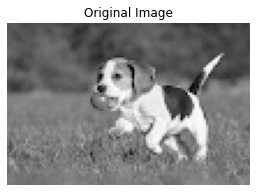

In [19]:
img = cv2.imread('dog.png', cv2.IMREAD_GRAYSCALE) 

plt.figure(figsize=(20, 16))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

(-0.5, 104.5, 69.5, -0.5)

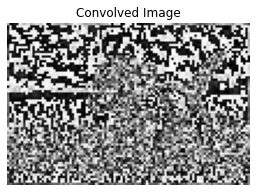

In [16]:
def convolve(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))

    i_h, i_w = image.shape
    k_h, k_w = kernel.shape
    

    pad_h = k_h // 2
    pad_w = k_w // 2
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    output = np.zeros_like(image)

    for i in range(i_h):
        for j in range(i_w):
            region = padded_img[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)
    
    return output

convolved = convolve(img, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(1, 4, 2)
plt.imshow(convolved, cmap='gray')
plt.title("Convolved Image")
plt.axis('off')


(-0.5, 104.5, 69.5, -0.5)

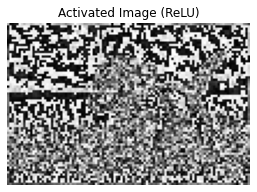

In [17]:
activated = np.maximum(convolved, 0)

plt.figure(figsize=(20, 16))
plt.subplot(1, 4, 3)
plt.imshow(activated, cmap='gray')
plt.title("Activated Image (ReLU)")
plt.axis('off')


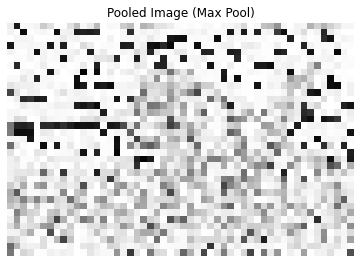

In [18]:
def max_pooling(image, size=2, stride=2):
    h, w = image.shape
    pooled = np.zeros((h // stride, w // stride))
    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            region = image[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(region)
    return pooled

pooled = max_pooling(activated, size=pool_size, stride=pool_size)

plt.figure(figsize=(20, 16))
plt.subplot(1, 4, 4)
plt.imshow(pooled, cmap='gray')
plt.title("Pooled Image (Max Pool)")
plt.axis('off')

plt.tight_layout()
plt.show()
